In [5]:
import math 
import random
import matplotlib.pyplot as plt


This [article](https://victorpoughon.fr/non-random-uniform-disk-sampling/) shows how to distribute points uniformly on a circle. Its fairly straightforward to do on a line or a rectangle but pretty challenging on a circle.

This article already had the code for the distribution, but not for plotting them. I plotted them using a new (to me) function called `ravel`.



In [2]:
import numpy as np

N = 50
M = np.floor((-np.pi + math.sqrt(np.pi**2 - 4*np.pi*(1-N))) / (2*np.pi))
alpha = (N-1)/(math.pi*M*(M+1))
R = np.arange(1, M+1)
S = 2*np.pi*alpha*R

print(S)
print("sum = ", S.sum())

[ 8.16666667 16.33333333 24.5       ]
sum =  49.0


In [33]:
import numpy as np

def uniform_disk_sampling(N, diameter):
    M = np.floor((-np.pi + np.sqrt(np.pi**2 - 4*np.pi*(1-N))) / (2*np.pi))
    if M == 0:
        M = 1
    alpha = (N-1)/(np.pi*M*(M+1))
    R = np.arange(1, M+1)
    S = 2*np.pi*alpha*R

    # If we're off, subtract the difference from the last element
    S = np.round(S)
    S[-1] -= (S.sum() - (N - 1))
    S = S.astype(int)

    # List of sample points, start with the origin point
    points = [np.zeros((1, 2))]

    for s, r in zip(S, R):
        theta = np.linspace(-np.pi, np.pi, s+1)[:-1]
        radius = r/M * diameter/2
        points.append(np.column_stack((radius*np.cos(theta), radius*np.sin(theta))))

    return np.vstack(points)

In [32]:
print(points.shape)

(150, 2)


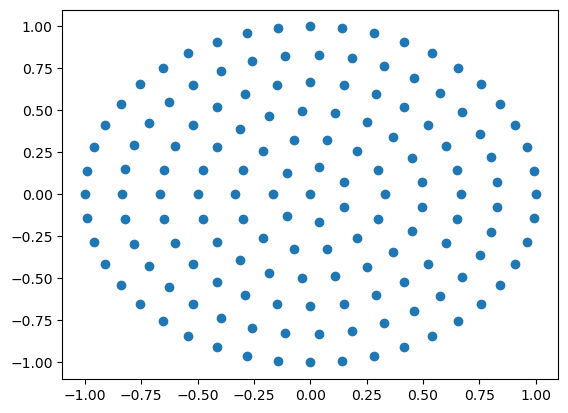

In [37]:
N = 50
plt.scatter(points[:, 0], points[:, 1])


In [39]:
N = [1, 2, 3, 4, 5, 6, 7, 8, 19, 20, 38, 39, 50, 75, 100, 150, 200, 300, 500, 1000, 2000, 3000, 5000, 10000]

In [38]:
ax.ravel?

Docstring:
a.ravel([order])

Return a flattened array.

Refer to `numpy.ravel` for full documentation.

See Also
--------
numpy.ravel : equivalent function

ndarray.flat : a flat iterator on the array.
Type:      builtin_function_or_method

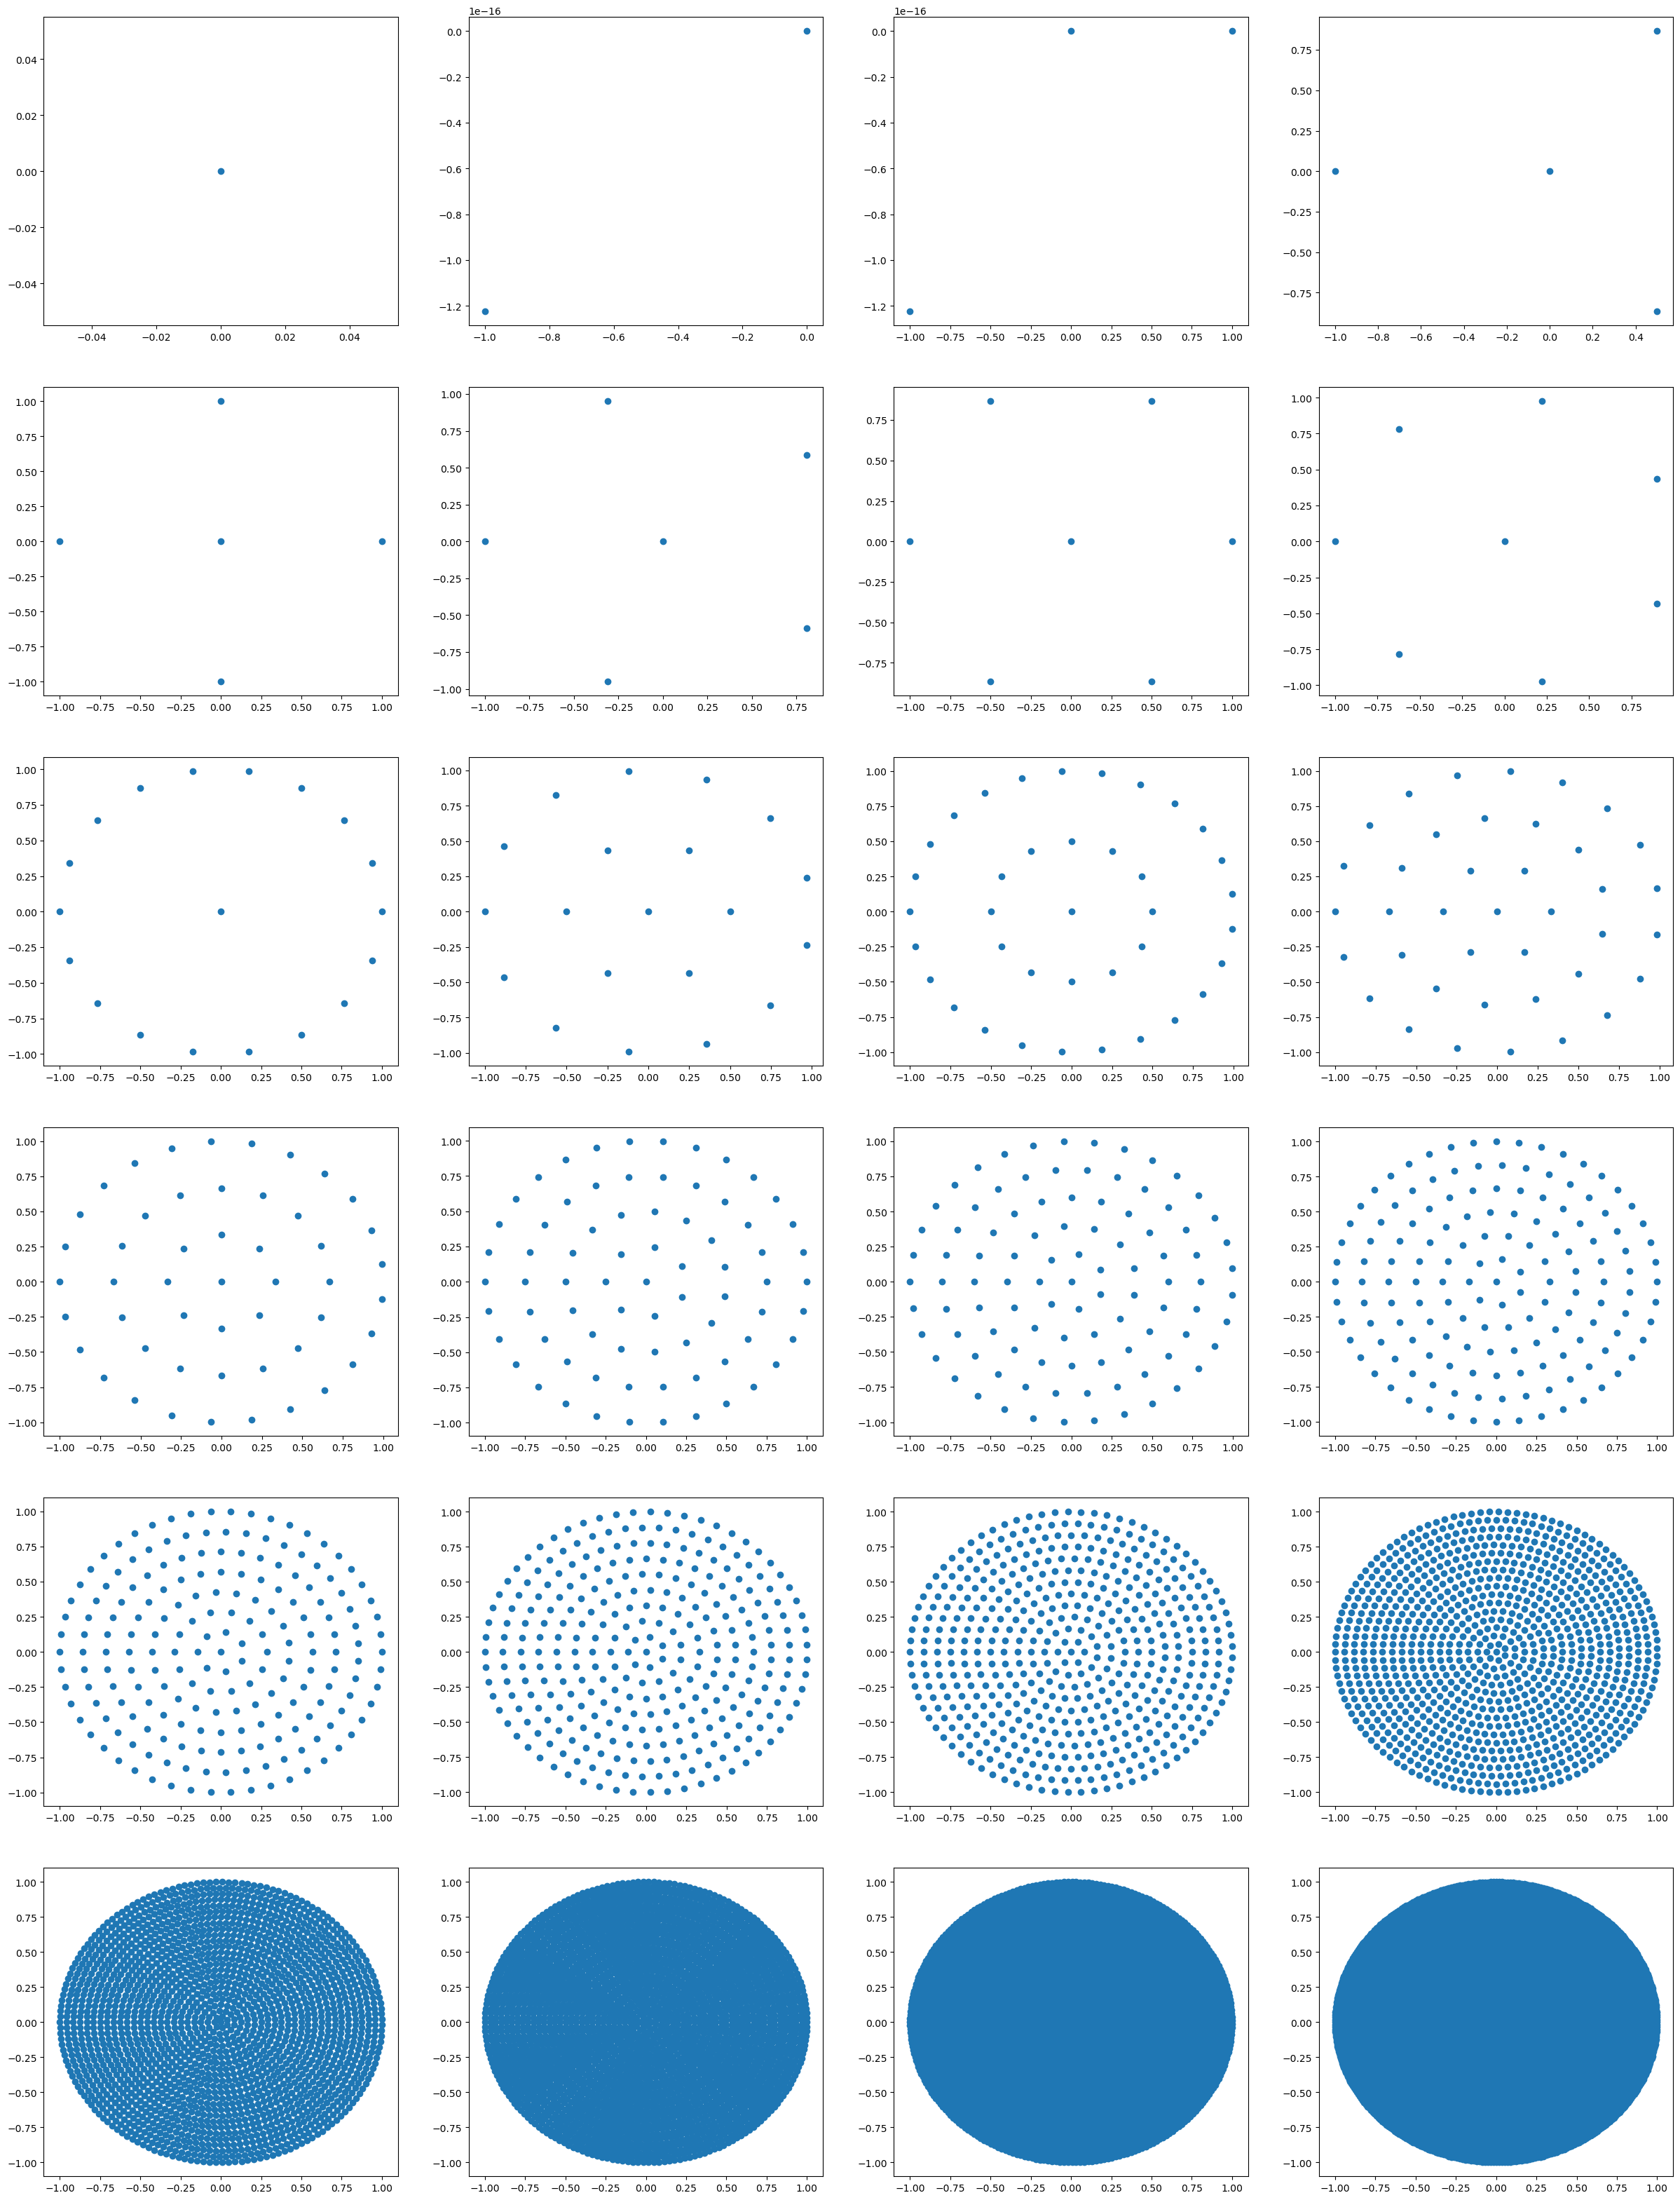

In [58]:
fig, ax = plt.subplots(6, 4, figsize = (30, 40))

for a, b in zip(ax.ravel(), N):
    points = uniform_disk_sampling(b, 2)
    a.scatter(points[:, 0], points[:, 1] ) 
plt.show()

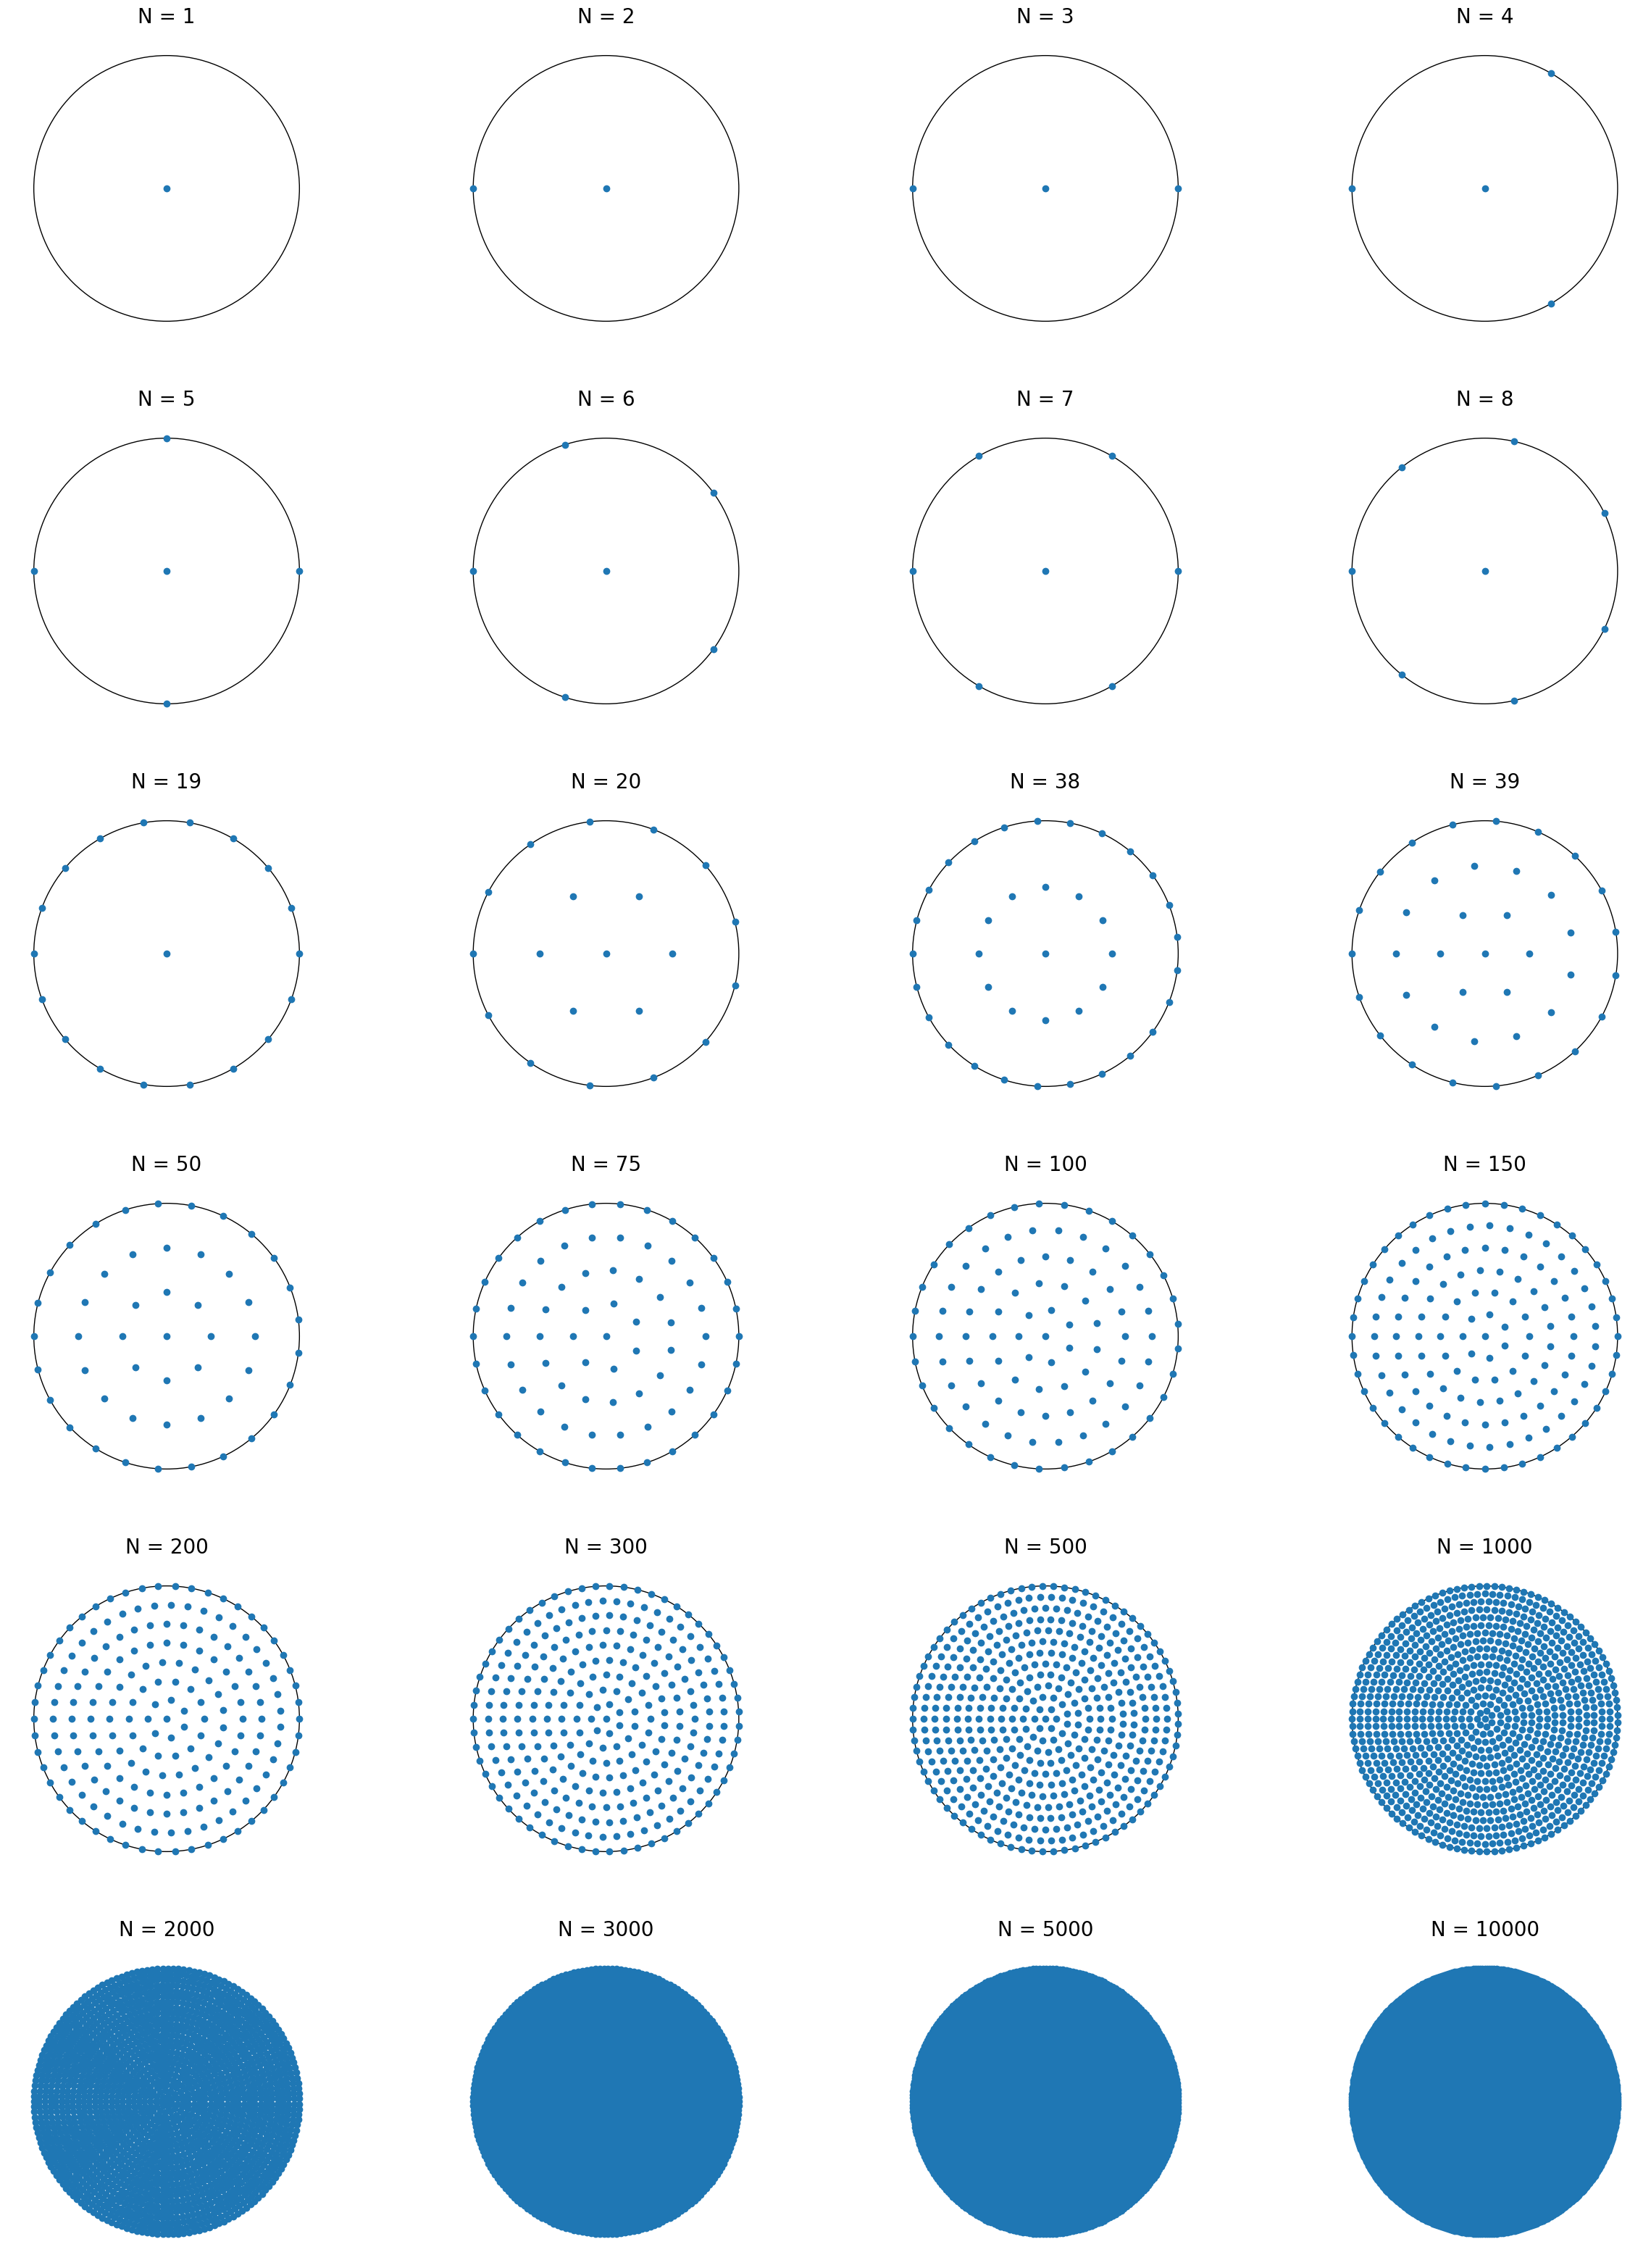

In [76]:
fig, ax = plt.subplots(6, 4, figsize=(30, 40))

for a, b in zip(ax.ravel(), N):
    points = uniform_disk_sampling(b, 2)

    circle = plt.Circle((0, 0), 1, fill=False)
    a.add_artist(circle)
    
    a.scatter(points[:, 0], points[:, 1])
    
    # Set equal aspect ratio and consistent limits
    a.set_aspect('equal')
    a.set_xlim(-1.2, 1.2)
    a.set_ylim(-1.2, 1.2)
    
    #removing the axes
    a.set_xticks([])
    a.set_yticks([])
    a.axis('off')
    
    # Add title
    s = "N = " + str(b)
    #a.set_title(f'N={b}', fontsize=20)
    a.set_title(s, fontsize=20)

plt.show()

`f`-strings

In [71]:
i = 2
j = 32
print("i = ", i, "j = ", j, " and i+j = ", i + j)

i =  2 j =  32  and i+j =  34


In [72]:
print(f'i = {i} j = {j} i + j = {i+j}')

i = 2 j = 32 i + j = 34
